# Credit Card Fraud Detection::

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load the csv file 

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [4]:
card = pd.read_csv('creditcard.csv')
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
card.shape

(284807, 31)

# check null values

In [6]:
card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# separates the data and labels 

In [8]:
data = card.loc[:,card.columns != 'Class']
labels = card.loc[:, 'Class']

In [9]:
print(f'Shape of data --> {data.shape}\nShape of label --> {labels.shape}')

Shape of data --> (284807, 30)
Shape of label --> (284807,)


# Split the data for training and testing

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,labels, test_size=0.3, random_state=40)

In [11]:
print(f'Shape of x_train --> {x_train.shape}\nShape of of x_test --> {x_test.shape}\nShape of y_train --> {y_train.shape}\nShape of y_test --> {y_test.shape}')

Shape of x_train --> (199364, 30)
Shape of of x_test --> (85443, 30)
Shape of y_train --> (199364,)
Shape of y_test --> (85443,)


# Standardized the input data

In [12]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [13]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# split the data for training and validation

In [14]:
val_x = x_train[:20000]
partial_x_train = x_train[20000:]
val_y = y_train[:20000]
partial_y_train = y_train[20000:]

In [15]:
print(f'''shape of partial_x_train --> {partial_x_train.shape}
shape of partial_y_train --> {partial_y_train.shape}
shape of val_x --> {val_x.shape}
shape of val_y --> {val_y.shape}''')

shape of partial_x_train --> (179364, 30)
shape of partial_y_train --> (179364,)
shape of val_x --> (20000, 30)
shape of val_y --> (20000,)


In [36]:
def build_model():
    model = Sequential()
    model.add(Dense(10, activation = 'tanh', input_shape = (x_train.shape[1],)))
    model.add(Dense(8, activation = 'tanh'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [37]:
model = build_model()
history = model.fit(partial_x_train, partial_y_train,
                   epochs = 7, 
                   validation_data = (val_x,val_y))

Epoch 1/7
5606/5606 [==============================] - 9s 1ms/step - loss: 0.0265 - accuracy: 0.9923 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 2/7
5606/5606 [==============================] - 8s 1ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 3/7
5606/5606 [==============================] - 8s 1ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 4/7
5606/5606 [==============================] - 8s 1ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9991
Epoch 5/7
5606/5606 [==============================] - 8s 1ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 6/7
5606/5606 [==============================] - 8s 1ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 7/7
5606/5606 [==============================] - 8s 1ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9994

# Evaluate the model

In [38]:
e_loss, e_acc = model.evaluate(x_test,y_test)

2671/2671 [==============================] - 4s 2ms/step - loss: 0.0023 - accuracy: 0.9996


In [39]:
print(f'Evaluation Loss --> {e_loss}\nEvaluation Accuracy --> {e_acc}')

Evaluation Loss --> 0.0023272817488759756
Evaluation Accuracy --> 0.9996137619018555


# Predict the model

In [40]:
result = model.predict(x_test)
result //= 100
result

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

# graphical representation of loss and accuracy

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

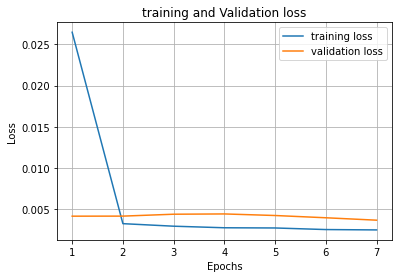

In [43]:
plt.plot(range(1, len(loss) + 1), loss, label = 'training loss')
plt.plot(range(1, len(loss) + 1), val_loss, label = 'validation loss')
plt.title('training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

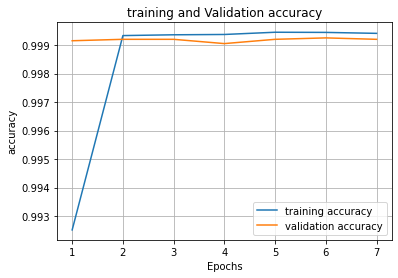

In [32]:
plt.plot(range(1, len(acc) + 1), acc, label = 'training accuracy')
plt.plot(range(1, len(acc)+ 1), val_acc, label = 'validation accuracy')
plt.title('training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()